In [2]:
import numpy as np
import pandas as pd

In [ ]:
pd.Series

In [3]:
from datetime import datetime

In [5]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [7]:
my_date = datetime(my_year, my_month, my_day)

In [8]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In the above as there is no hour and minute specifies, so python puts their values as 'zero'.

In [10]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [11]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [17]:
np.array(['2020-11-22', '2020-11-23', '2020-11-24'], dtype='datetime64')

array(['2020-11-22', '2020-11-23', '2020-11-24'], dtype='datetime64[D]')

In [18]:
np.array(['2020-11-22', '2020-11-23', '2020-11-24'], dtype='datetime64[M]')

array(['2020-11', '2020-11', '2020-11'], dtype='datetime64[M]')

In [ ]:
np.arrange

In [19]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('Jan 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
%matplotlib inline

In [7]:
pwd

'C:\\Users\\salil'

In [13]:
df = pd.read_csv("C:/Users/salil/starbucks.csv", index_col='Date', parse_dates=True)

In [14]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


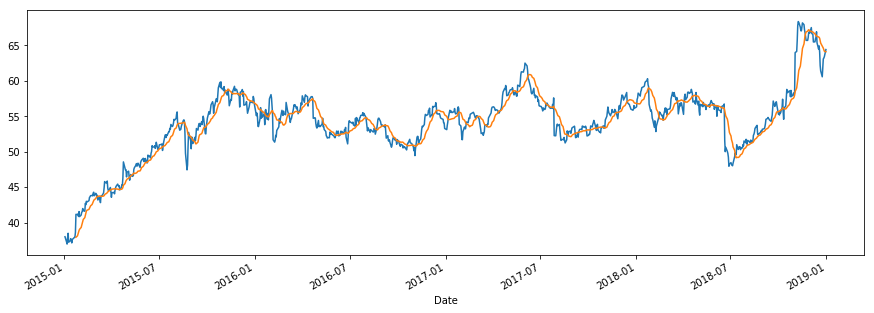

In [22]:
df['Close'].plot(figsize=(15,5))
df.rolling(window=15).mean()['Close'].plot()

In [23]:
df['Close:30DayMean'] = df.rolling(window=30).mean()['Close']

In [24]:
df.head()

,Close,Volume,Close:30DayMean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


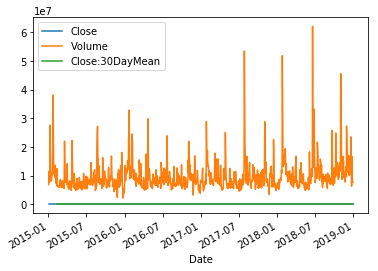

In [25]:
df.plot()

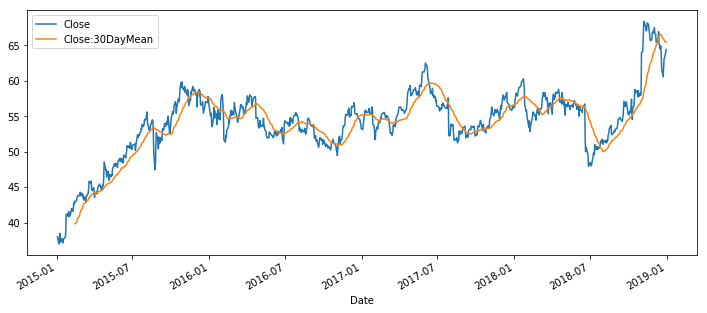

In [28]:
df[['Close', 'Close:30DayMean']].plot(figsize=(12,5))

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

In [13]:
df = pd.read_csv("C:/Users/salil/macrodata.csv", index_col=0, parse_dates=True)

In [14]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


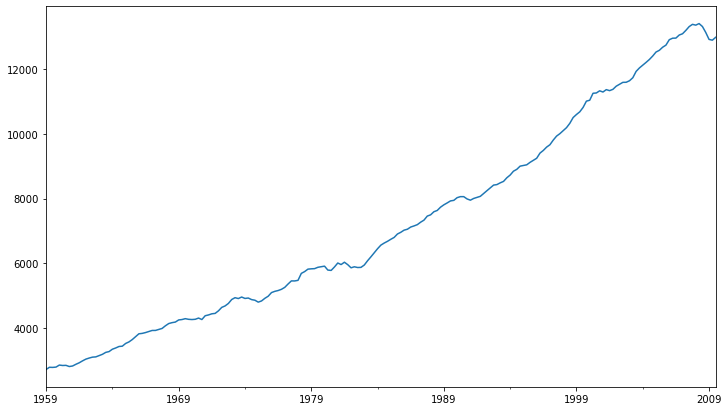

In [15]:
df['realgdp'].plot(figsize=(12,7))

This is the time series plot that we get for real gdp. We now use statsmodels to get the trend. The Hodrick Prescott filter will separate this out into a trend and cyclical component.

In [16]:
from statsmodels.tsa.filters.hp_filter import hpfilter

So we import the hpfilter from the statsmodels time series analysis library/package.(Hodrick Prescott filter). In the next cell we keep the value of lamda to be equal to 1600 as it is quarterly data. What lamda does is it smooths out the variations.

In [17]:
# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [18]:
type(gdp_trend)

pandas.core.series.Series

In [20]:
df['Trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,Trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


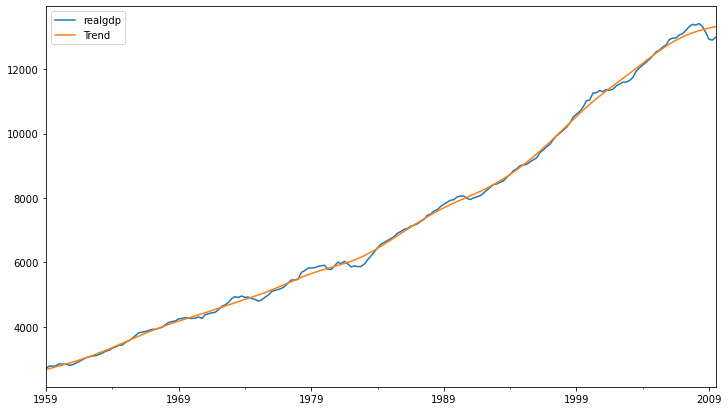

In [22]:
df[['realgdp', 'Trend']].plot(figsize=(12,7))

You can see if the realgdp is lying above or below the trend in any particular time period.

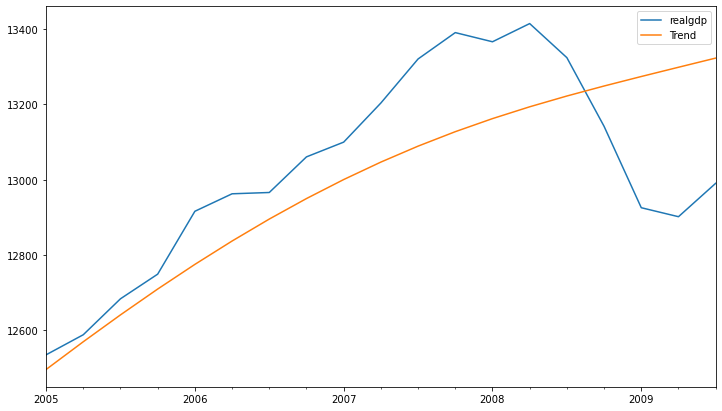

In [26]:
df[['realgdp', 'Trend']]['2005-3-31':].plot(figsize=(12,7))

In [26]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
airline = pd.read_csv('C:/Users/salil/airline_passengers.csv',index_col='Month',parse_dates=True)

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
#As there lie a lot of missing data, just for the ETS decomposition to work in a proper manner, we remove the NA values.
airline = airline.dropna()

In [11]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


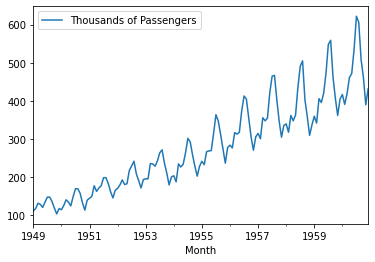

In [13]:
airline.plot()

In [14]:
#We load in the library. 
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
#We use the ultiplicative model as there are some traces of exponential trend rather than a linear trend.
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

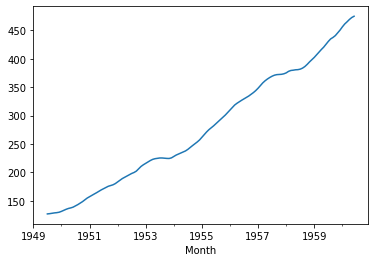

In [18]:
result.trend.plot()

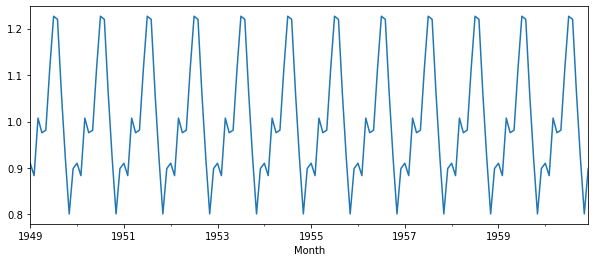

In [20]:
result.seasonal.plot(figsize=(10,4))

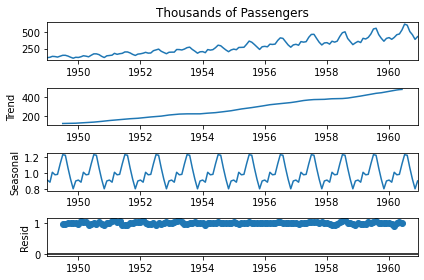

In [22]:
result.plot();

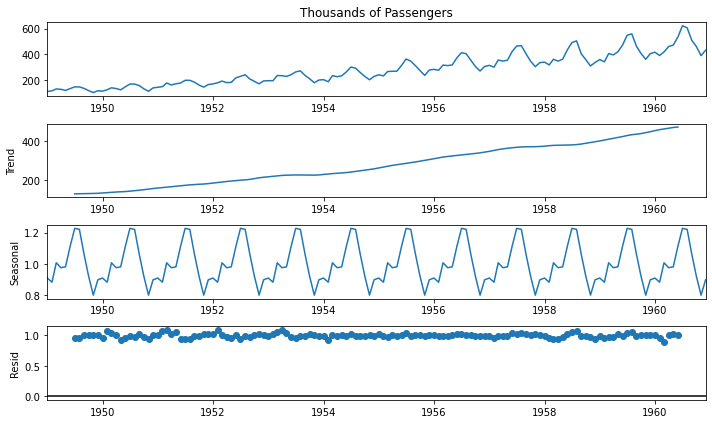

In [25]:
#We try to expand the plot horizontally.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

result.plot();

In [28]:
import matplotlib.pyplot as plt

In [29]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [30]:
airline.index = pd.to_datetime(airline.index)
#This is in case to convert it into a date string.

In [31]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [32]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [37]:
airline.head(20)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


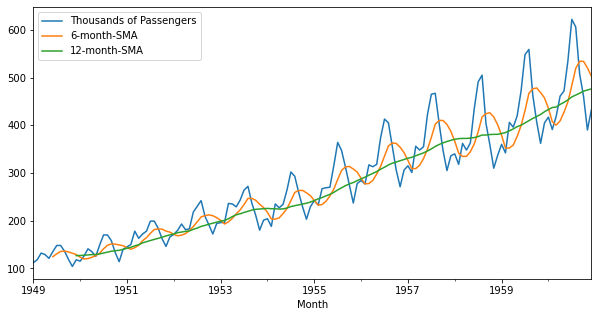

In [41]:
airline.plot(figsize=(10,5))

We now build an EWMA which covers some of the drawbacks of the SMA. The limitations of the latter are mentioned in the jupyter notebook of the respective video. You may also watch the video.


In [52]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

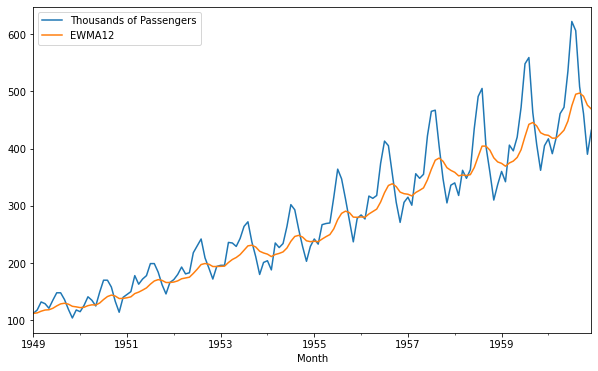

In [53]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize=(10,6));

In [65]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=5,adjust=False).mean()
#Use this cell to see the difference in the graphs because of a changed value of span.

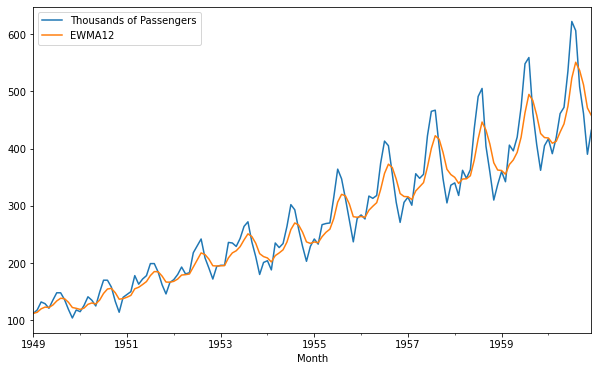

In [66]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize=(10,6));

In [45]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [46]:
#Here the frequency is not present by default. 
#As the time series data shows data at the starting of each months, what we do is set the frequency accordingly.
#The codes or the strings are given in the notebook i.e. you can find the link over there.
airline.index.freq = 'MS'

In [47]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [48]:
#Here we import the library.
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [49]:
span = 12
alpha = 2/(span+1)

In [ ]:
#Span corresponds to what is commonly called an “N-day EW moving average”.
#Alpha specifies the smoothing factor directly.
#We have to pass precisely one of the above into the .ewm() function. For our data we'll use span=12.

Not Written the entire code. Will have to take a look at the video and the notebook again to recall the concepts and use them in a better manner.
##Break##